In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import csv
from tqdm import tqdm

In [18]:
df = pd.read_csv('coarse_checkboard_fin2.csv')
df

,x,y,z,I,r,g,b
0,-2.051,-4.301,-0.771,-130,0,11,0
1,-2.062,-4.290,-0.769,-84,0,16,0
2,-2.075,-4.274,-0.768,-131,0,12,0
3,-2.098,-4.245,-0.768,-180,0,8,0
4,-2.110,-4.231,-0.768,-181,0,9,1
...,...,...,...,...,...,...,...
1210680,2.139,0.550,2.337,-1170,255,255,255
1210681,2.101,0.579,2.317,-1461,255,255,255
1210682,2.056,0.623,2.305,-1704,207,192,220
1210683,2.059,0.616,2.316,-1320,255,255,255


In [19]:
def list_import(x):
    new_list = []
    for i in x:
        new_list.append(i)
        
        return new_list

In [35]:
x = df['x']
y = df['y']

x_list = list_import(x)
y_list = list_import(y)

cond = -3101/2625 * x +3.101
y_index = np.where(y>cond)

export_data = []
for i in tqdm(y_index[0]):
    export_data.append(df.loc[i])

100%|████████████████████████████████████████████████████████████████████████| 159575/159575 [00:16<00:00, 9393.42it/s]


In [36]:
df1 = pd.DataFrame(export_data, columns=['x','y','z','r','g','b'])
df1

,x,y,z,r,g,b
145979,3.063,-0.516,-1.282,0.0,11.0,2.0
146382,3.066,-0.516,-1.271,4.0,8.0,4.0
146383,3.069,-0.518,-1.260,0.0,7.0,4.0
146388,3.067,-0.519,-1.207,23.0,32.0,40.0
146391,3.067,-0.519,-1.183,16.0,38.0,42.0
...,...,...,...,...,...,...
1210663,2.338,0.373,2.377,70.0,89.0,108.0
1210664,2.308,0.393,2.377,74.0,89.0,98.0
1210665,2.315,0.403,2.369,71.0,79.0,99.0
1210666,2.306,0.402,2.377,59.0,78.0,88.0


In [37]:
cols = ['r','g','b']
df1[cols] = df1[cols].applymap(np.int64)
df1

,x,y,z,r,g,b
145979,3.063,-0.516,-1.282,0,11,2
146382,3.066,-0.516,-1.271,4,8,4
146383,3.069,-0.518,-1.260,0,7,4
146388,3.067,-0.519,-1.207,23,32,40
146391,3.067,-0.519,-1.183,16,38,42
...,...,...,...,...,...,...
1210663,2.338,0.373,2.377,70,89,108
1210664,2.308,0.393,2.377,74,89,98
1210665,2.315,0.403,2.369,71,79,99
1210666,2.306,0.402,2.377,59,78,88


In [38]:
new_csv_file = df1.to_csv(r'C:\Users\user\coarse_checkboard_edit.csv', index=None)

In [1]:
df2 = pd.read_csv('coarse_checkboard_edit.csv')
df2

NameError: name 'pd' is not defined

<IPython.core.display.Javascript object>


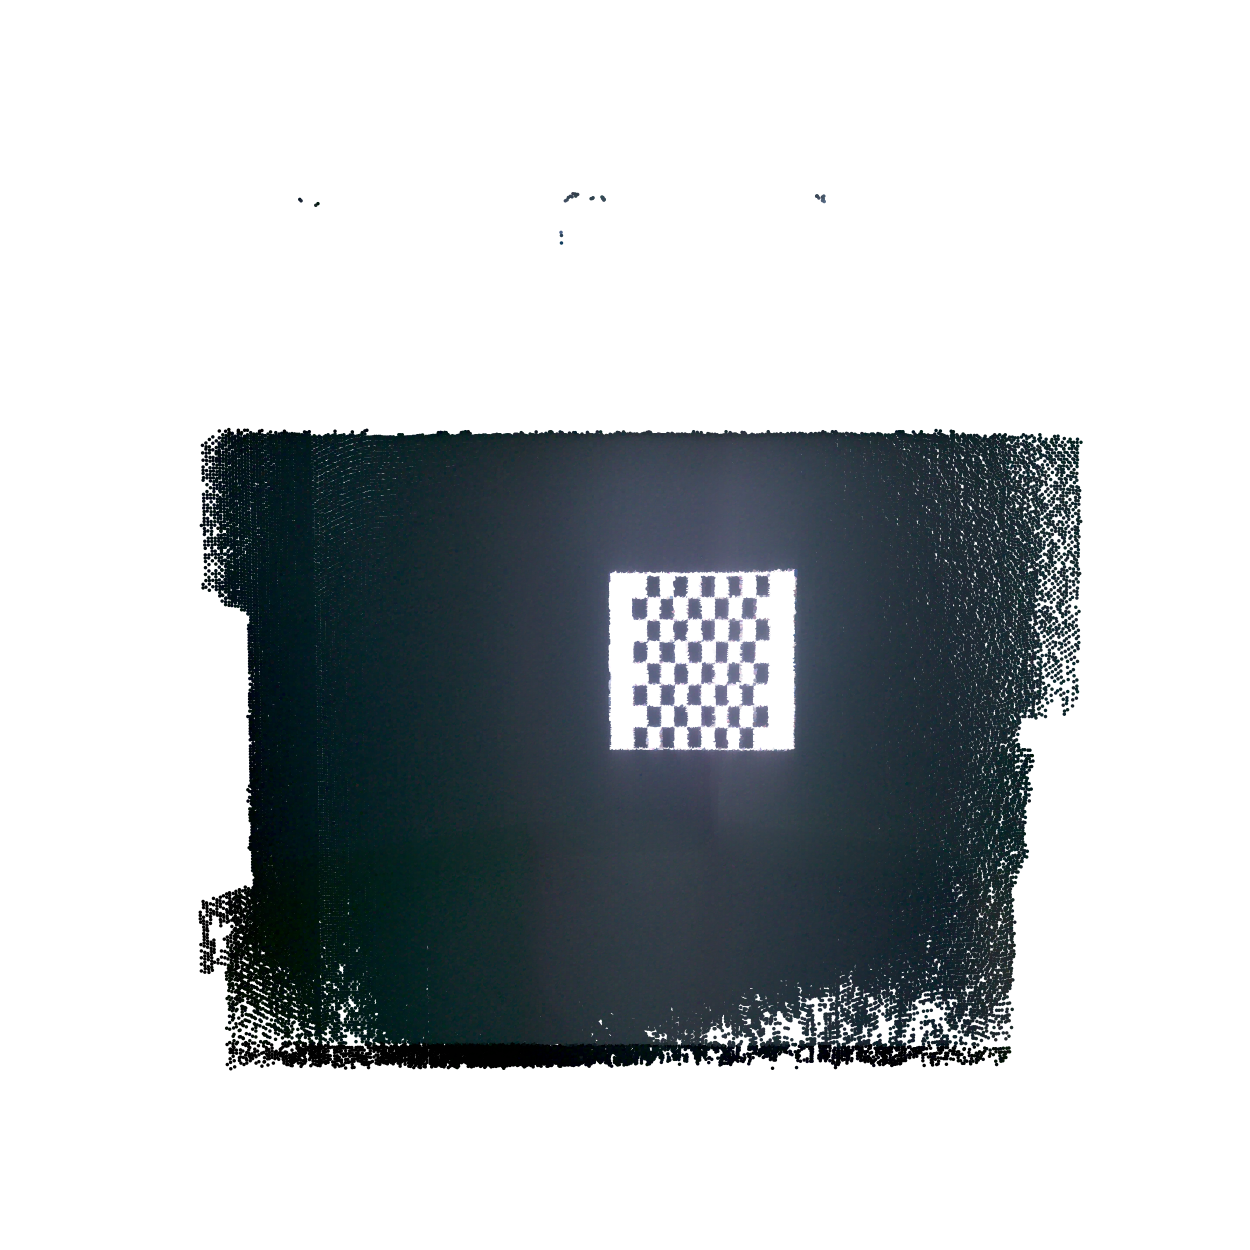

In [4]:
data = pd.read_csv('coarse_checkboard_edit.csv')

x = data['x']
y = data['y']
z = data['z']
r = data['r']
g = data['g']
b = data['b']

numtest = 159575
px = [0 for i in range(numtest)]
py = [0 for i in range(numtest)]
pz = [0 for i in range(numtest)]
pr = [0 for i in range(numtest)]
pg = [0 for i in range(numtest)]
pb = [0 for i in range(numtest)]

for i in range(numtest):
    px[i] = x[i]
    py[i] = y[i]
    pz[i] = z[i]
    #pz[i] = 0
    py[i] = 0
    #px[i] = 0
    pr[i] = r[i]
    pg[i] = g[i]
    pb[i] = b[i]
    #print(px[i], py[i], pz[i], pr[i],pg[i],pb[i])


cc= [pr[i]*65536+pg[i]*256+pb[i] for i in range(numtest)]

#290421 빈 배열 만들어주기
fin_ccc = [0 for i in range(numtest)]

#16진수로 가져오면서 앞에 두자리인 '0x' 제외시키고 0을 채워주고 # 붙여서 출력
cc_hex = [hex(cc[i])[2:] for i in range(numtest)]
for i in range(numtest):
    l=len(cc_hex[i])
    o=''
    for k in range(0, 6-l):
        o = o + '0'
    fin_cc = '#'+ o + cc_hex[i]
    fin_ccc[i] = fin_cc
#print(fin_ccc)

##그리기
fig = plt.figure(figsize=(10,10), frameon=False)
ax = fig.add_subplot(1,1,1)

ax.scatter(px,pz, marker='o', s=1, c=fin_ccc) ##s가 다른 상황도 여겨보자.

ax.set_xlabel('x')
ax.set_ylabel('y')
#plt.xlim([0,800])
#plt.ylim([0,800])
ax.axis('off')
plt.show()
plt.savefig('coarsecheck2.png', bbox_inches='tight', pad_inches = 0)